In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter


In [4]:
raw_df = pd.read_csv('drive/MyDrive/STT811 Project/fraudTrain.csv')


In [5]:
raw_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

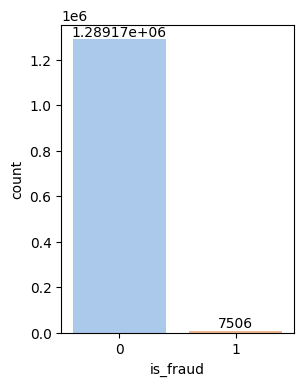

In [7]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)


In [8]:
print('Genuine:', round(raw_df['is_fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['is_fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')


Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In [9]:
df = raw_df.copy()


In [10]:
df.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [11]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)


Duplicated values dropped succesfully
****************************************************************************************************


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
from datetime import datetime

cols = df.columns

'''Step-1: Segragating data-time, categorical, numerical, and output features and removing  
Nominal, meaning less, complicated ones '''
date_features = [cols[1], cols[19]]
cat_features = [cols[2], cols[4], cols[8], cols[10], cols[11], cols[12], cols[16]]
num_features = [cols[5], cols[13], cols[14], cols[15], cols[17], cols[20], cols[21]  ]
output_features = [cols[22]]

# Concatenate the feature lists into a single list
all_features = date_features + cat_features + num_features + output_features
df =  df[all_features]
print(all_features)

train_dt =  df[all_features]

train_dt.columns

(train_dt).isna().sum()

train_dt.dtypes

from math import sin, cos, sqrt, atan2, radians


['trans_date_trans_time', 'unix_time', 'cc_num', 'category', 'gender', 'city', 'state', 'zip', 'job', 'amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud']


In [14]:
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth radius in miles

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the distance using the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def new_features(data):
    df = data.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date'] = df['trans_date_trans_time'].dt.date
    df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['avg_category_amt'] = df.groupby('category')['amt'].transform('mean')
    df['amt_above_avg_category_amt'] = (df['amt'] > df['avg_category_amt']).astype(int)
    df = df.sort_values(['cc_num', 'trans_date_trans_time'], ascending=[True, True])
    df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()
    df['trans_freq'] = df.groupby('cc_num')['trans_date_trans_time'].transform('count')
    df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].transform(lambda x: x.max() - x)
    df = df.sort_index()
    df['distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
    df['time_since_last_trans'] = df['time_since_last_trans'].dt.total_seconds()
    df['days_since_last_trans'], df['hours_since_last_trans'] = divmod(df['time_since_last_trans'], 86400)
    df['hours_since_last_trans'] /= 3600
    df['days_since_last_trans'] = df['days_since_last_trans'].astype(int)
    df['hours_since_last_trans'] = df['hours_since_last_trans'].astype(int)
    train_dt['dob'] = train_dt['dob'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    date  = pd.to_datetime(df['trans_date'])
    df['age']    = ( date- train_dt['dob']).dt.days.astype(int)
    return df


engineered_data_train = pd.DataFrame()
engineered_data_train = new_features(train_dt)

engineered_data_train.head(10)

engineered_data_train.columns

# Drop irrelevant columns
engineered_data_train = engineered_data_train.drop(['trans_date_trans_time', 'unix_time', 'cc_num','city', 'zip', 'lat', 'long', 'merch_lat', 'merch_long','avg_category_amt','dob'], axis=1)


# define a function to encode time difference into categories
def encode_time_diff(time_diff):
    if time_diff <= pd.Timedelta(weeks=8):
        return 'recent'
    elif time_diff <= pd.Timedelta(weeks=20):
        return 'moderate'
    else:
        return 'long ago'

def encode_features(data):
    df = data.copy()
    region_dict = {'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South',
                     'CA': 'West', 'CO': 'West', 'CT': 'Northeast', 'DE': 'South',
                     'FL': 'South', 'GA': 'South', 'HI': 'Pacific','DC':'Northeast', 'ID': 'West',
                     'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
                     'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
                     'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South',
                     'MO': 'Midwest', 'MT': 'West', 'NE': 'Midwest', 'NV': 'West',
                     'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast',
                     'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South',
                     'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
                     'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West',
                     'VT': 'Northeast', 'VA': 'South', 'WA': 'West', 'WV': 'South',
                     'WI': 'Midwest', 'WY': 'West'}
    
    week_dict = {'Monday': 'weekday', 
                 'Tuesday': 'weekday', 
                 'Wednesday': 'weekday', 
                 'Thursday': 'weekday', 
                 'Friday': 'weekday',
               'Saturday': 'weekend',
                'Sunday': 'weekend'}
    df['day_of_week'] = df['day_of_week'].map(week_dict)
    
    # Use the dictionary to map the states to their regions
    df['region'] = df['state'].map({state: region for region, states in region_dict.items() for state in states})

    df['region'] = df['state'].map(region_dict)
    df['gender'] = df['gender'].map({'F': 0, 'M': 1})
    df['category'] = pd.factorize(df['category'])[0]
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    RN_date = datetime.now()
    df['time_diff'] = (RN_date - df['trans_date'])
    df['trans_date_encoded'] = df['time_diff'].apply(encode_time_diff)
    # create bins for the different times of day
    bins = [0, 12, 18, 24]
    labels = ['morning', 'afternoon', 'evening']
    # use the cut() function to encode the 'trans_time_of_day' column
    df['trans_hour'] = pd.cut(pd.to_datetime(df['trans_hour']).dt.hour, bins=bins, labels=labels, include_lowest=True)
    return df

encoded_engineered_data_train = pd.DataFrame()
encoded_engineered_data_train = encode_features(engineered_data_train)
# drop: state, job, time_diff, trans_date
#encoded_engineered_data = encoded_engineered_data.drop(['state', 'job', 'time_diff','trans_date'],axis=1)

encoded_engineered_data_train = encoded_engineered_data_train.drop(['state', 'job', 'time_diff','trans_date'],axis=1)

(encoded_engineered_data_train).isna().sum()

encoded_engineered_data_train["region"].unique()

encoded_engineered_data_train.head(10)

encoded_engineered_data_train.dtypes


dummy = encoded_engineered_data_train.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dummy['day_of_week'] = le.fit_transform(dummy['day_of_week'])
dummy['trans_hour'] = le.fit_transform(dummy['trans_hour'])
dummy['region'] = le.fit_transform(dummy['region'])
dummy['time_since_last_trans'] = le.fit_transform(dummy['time_since_last_trans'])
dummy['days_since_last_trans'] = le.fit_transform(dummy['days_since_last_trans'])
dummy['hours_since_last_trans'] = le.fit_transform(dummy['hours_since_last_trans'])
dummy['trans_date_encoded'] = le.fit_transform(dummy['trans_date_encoded'])

In [15]:
dummy.head()

,category,gender,amt,city_pop,is_fraud,day_of_week,trans_hour,amt_above_avg_category_amt,time_since_last_trans,trans_freq,distance,days_since_last_trans,hours_since_last_trans,age,region,trans_date_encoded
0,0,0,4.97,3495,0,0,0,0,1274980,2028,48.838809,537,6,11255,3,0
1,1,0,107.23,149,0,0,0,0,1275065,3030,18.773185,537,7,14804,4,0
2,2,1,220.11,4154,0,0,0,1,1273151,503,67.236892,536,7,20801,4,0
3,3,1,45.00,1939,0,0,0,0,1271597,493,59.449252,535,1,18982,4,0
4,4,1,41.96,99,0,0,0,0,1274854,2017,48.192064,537,3,11967,3,0


In [16]:
X = dummy.drop('is_fraud', axis=1)
y = dummy['is_fraud']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df
X_train = Standard_Scaler (X_train, X_train.columns)
X_test = Standard_Scaler (X_test, X_train.columns)

# Modelling

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)


In [20]:
# Best parameters: {'max_depth': 12, 'n_estimators': 100, }


In [21]:
rf = RandomForestClassifier(**{'max_depth': 12, 'n_estimators': 100})

In [22]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12)

In [23]:
y_pred = rf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[386692     59]
 [  1257    995]]


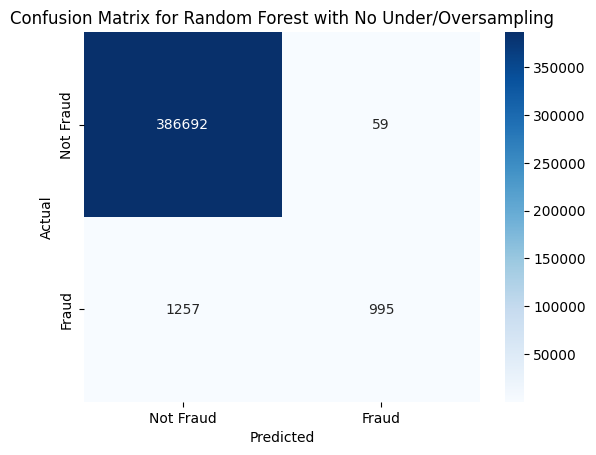

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest with No Under/Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


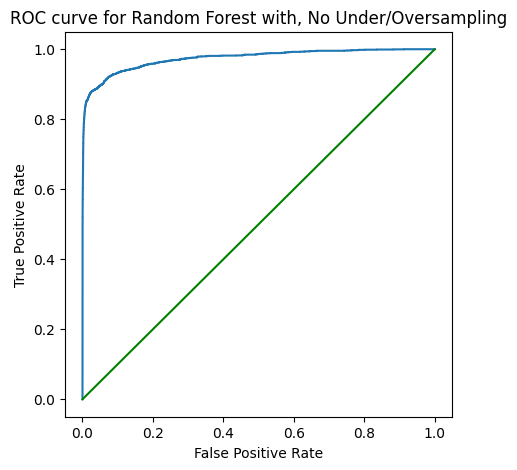

In [86]:
y_proba = rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC curve for Random Forest with, No Under/Oversampling')

# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot

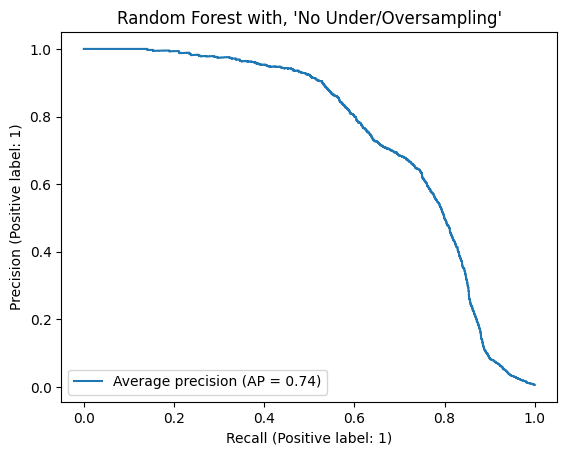

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with, 'No Under/Oversampling'")


In [25]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.441829,0.944023,0.601936,0.996617


In [26]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')


Genuine: 902418 / 50.0 % of the dataset
Frauds: 902418 / 50.0 % of the dataset


In [28]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              RandomForestClassifier(n_estimators=250, max_depth=500))

In [29]:
random_overs_pipeline.fit(X_train,y_train)

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=500, n_estimators=250))])

In [30]:
y_pred = random_overs_pipeline.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)


[[386665     86]
 [   821   1431]]


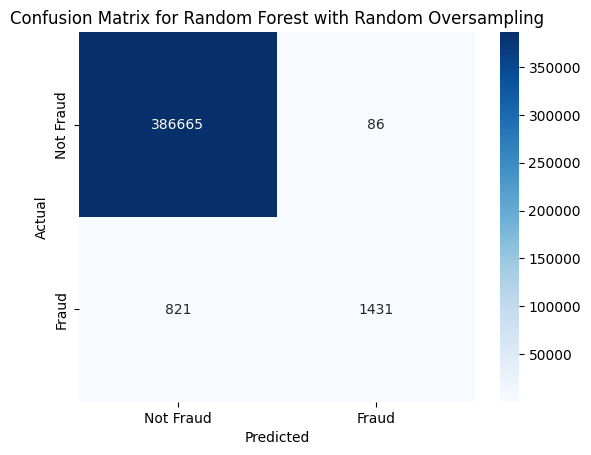

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = random_overs_pipeline.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest with Random Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


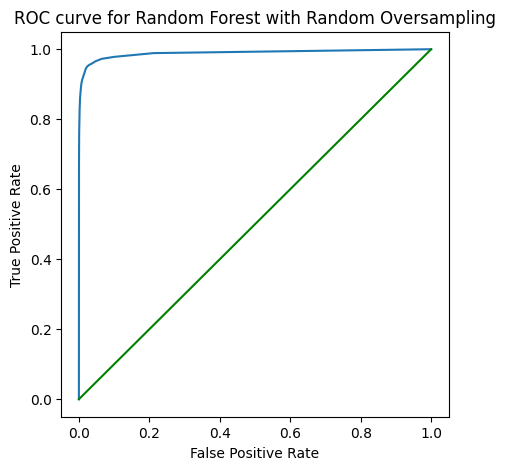

In [85]:
y_proba = random_overs_pipeline.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC curve for Random Forest with Random Oversampling')

# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot

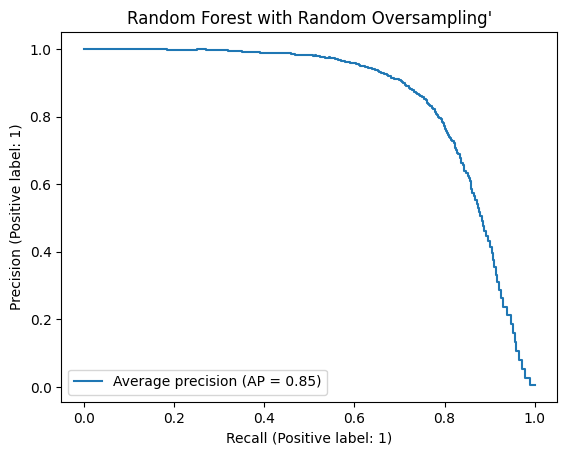

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    random_overs_pipeline, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with Random Oversampling'")


In [32]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.635435,0.943309,0.759353,0.997668


In [33]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=250, max_depth=500))


In [34]:
smote_pipeline.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=500, n_estimators=250))])

In [35]:
y_pred = smote_pipeline.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)


[[376064  10687]
 [   424   1828]]


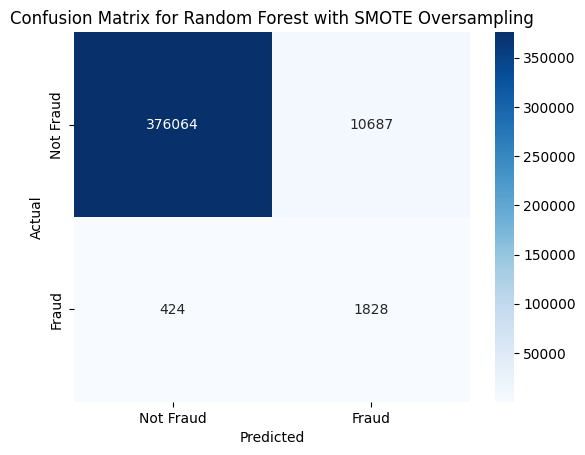

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = smote_pipeline.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest with SMOTE Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


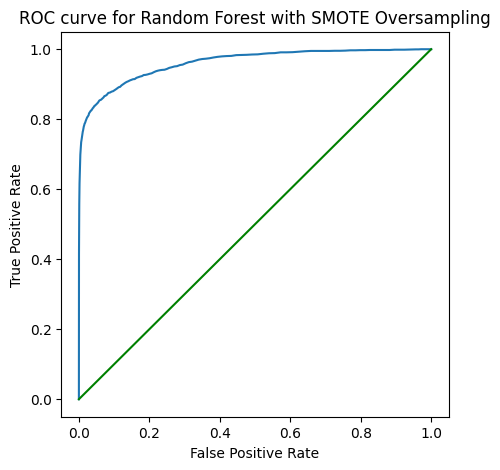

In [84]:
y_proba = smote_pipeline.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC curve for Random Forest with SMOTE Oversampling')

# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot

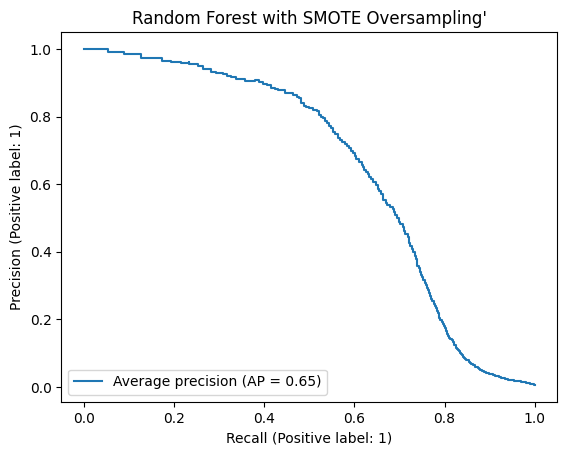

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    smote_pipeline, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with SMOTE Oversampling'")


In [37]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.811723,0.146065,0.247579,0.971437


In [38]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks


SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=250, max_depth=500))


In [39]:
SMOTETomek_pipeline.fit(X_train,y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=500, n_estimators=250))])

In [40]:
y_pred = SMOTETomek_pipeline.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)


[[374861  11890]
 [   417   1835]]


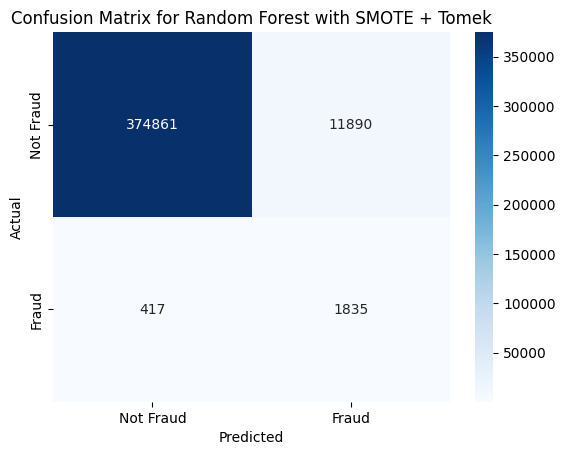

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = SMOTETomek_pipeline.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest with SMOTE + Tomek')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


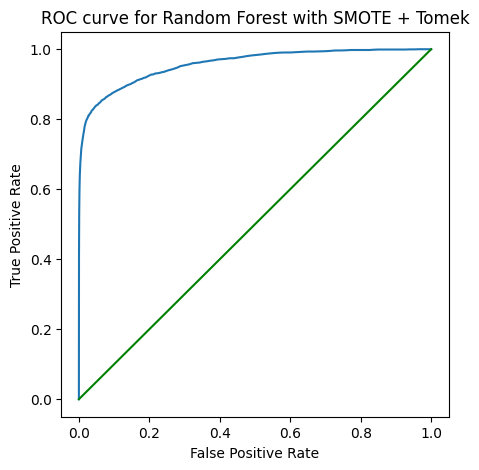

In [83]:
y_proba = SMOTETomek_pipeline.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC curve for Random Forest with SMOTE + Tomek')

# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot

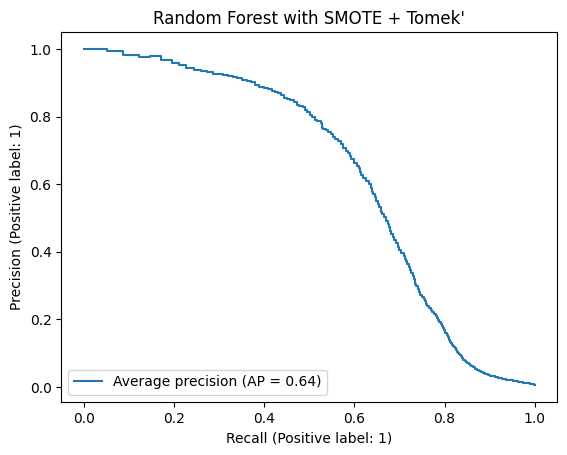

In [67]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    SMOTETomek_pipeline, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with SMOTE + Tomek'")


In [42]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.814831,0.133698,0.229705,0.968363


In [43]:
rfb = RandomForestClassifier(n_estimators=250, max_depth=500, class_weight="balanced")

In [44]:
rfb.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=500, n_estimators=250)

In [45]:
y_pred = rfb.predict(X_test)


In [46]:
cm = confusion_matrix(y_test, y_pred)

grid_rfb_Recall = recall_score(y_test, y_pred)
grid_rfb_Precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)

print(cm)


[[386708     43]
 [  1024   1228]]


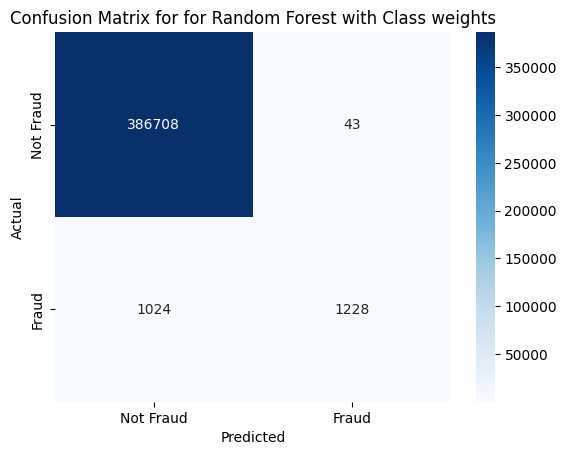

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = rfb.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest with Class weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.545293,0.966168,0.697133,0.997257


In [48]:
predictions = pd.concat([rf_score, over_rf_score, smote_rf_score, SMOTETomek_rf_score, grid_rfb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)


,Random Forest with,Recall,Precision,F1 Score,Accuracy
3,SMOTE + Tomek,0.814831,0.133698,0.229705,0.968363
2,SMOTE Oversampling,0.811723,0.146065,0.247579,0.971437
1,Random Oversampling,0.635435,0.943309,0.759353,0.997668
4,Class weights,0.545293,0.966168,0.697133,0.997257
0,No Under/Oversampling,0.441829,0.944023,0.601936,0.996617


In [49]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")


AUC-ROC Curve for Random Forest with Class weights: 0.7726


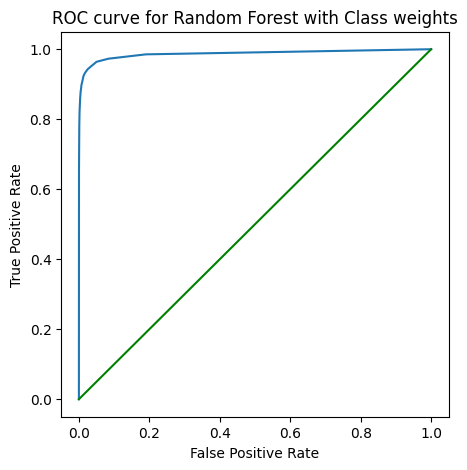

In [82]:
y_proba = rfb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC curve for Random Forest with Class weights')


# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot

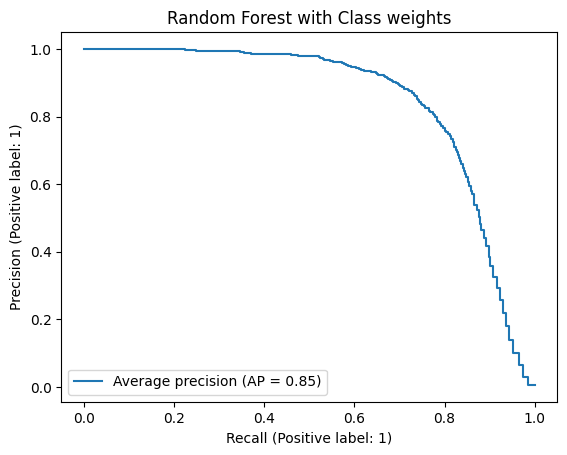

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rfb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with Class weights")


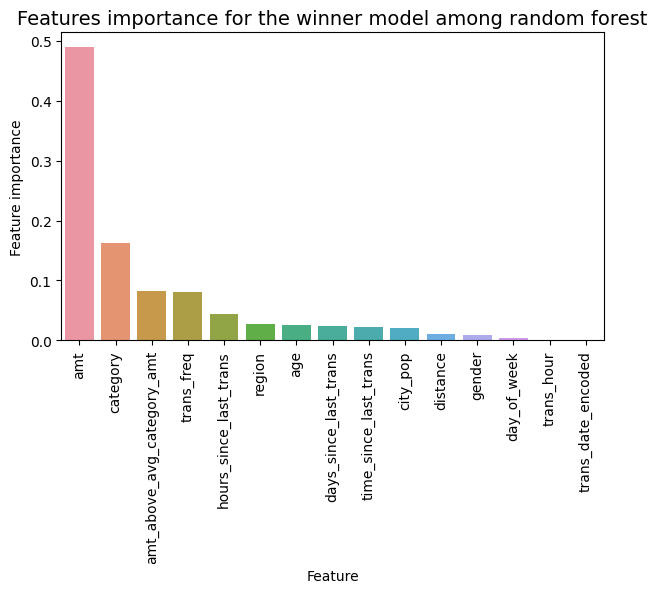

In [79]:
tmp = pd.DataFrame({'Feature': X_train.columns,
                    'Feature importance': SMOTETomek_pipeline.get_params()['randomforestclassifier'].feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance for the winner model among random forest',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()
